## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources :
- Ground truth notebook : https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
- Book version of notebook : https://www.learnpytorch.io/01_pytorch_workflow/
- Ask a Question : https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [49]:
what_were_covering = { 1 : "data(prepare and load)",
                       2 : "build model",
                       3 : "fitting the model to data(training)",
                       4 : "making predictions and evaluting a model (inference)",
                       5 : "saving and loading a model",
                       6 : "putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [50]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.4.0'

## Preparing and loading data

Data can be almost anything in machine learning

* excel spreadsheet
* images of any kind
* videos (YouTube has lots of data)
* audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts :

1. 데이터를 숫자 표현으로 변환
2. 해당 숫자 표현으로 패턴을 학습하는 모델을 구축

- Linear Regression(선형 회귀) 
    - 선형 회귀는 가장 단순한 지도 학습(Supervised Learning) 알고리즘 중 하나이다. 
    - 주어진 데이터를 기반으로 독립 변수  X 와 종속 변수  y  사이의 선형 관계를 찾는 모델




In [51]:
import torch

# 1. 가중치와 편향 설정
weight= 0.7  # b
bias = 0.3    # a

# 2. 데이터 생성 (입력값 X)
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

# 3. 출력값 Y 계산
y = weight * X + bias  # 선형 회귀 공식 적용

# 4. 데이터 확인
print("X:", X[:10])  # X의 처음 10개 값
print("y:", y[:10])  # y의 처음 10개 값
print("X 길이:", len(X))
print("y 길이:", len(y))

X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
X 길이: 50
y 길이: 50


### Splitting data into training and testing data sets (One of the most important concepts and machine learning)
데이터를 훈련 세트와 테스트 세트로 분할하는 것은 가장 중요한 개념 중 하나이다.

- Three datasets : 데이터를 세 가지 데이터 세트로 분할
    - Training set : 모델을 학습하는 데 사용되는 데이터 (60-80%)
    - Validation set : 모델을 평가하는 데 사용되는 데이터 (10-20%)
    - Test set : 모델을 평가하는 데 사용되는 데이터 (10-20%)



In [52]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # 훈련 세트로 분할
X_test, y_test = X[train_split:], y[train_split:] # 테스트 세트로 분할

len(X_train), len(y_train), len(X_test), len(y_test) # 훈련 세트와 테스트 세트의 길이 출력


(40, 40, 10, 10)

In [ ]:
X_train, y_train

데이터를 어떻게 하면 더 잘 시각화할 수있을까?
그리고 이것이 데이터 탐색기의 모토가 등장하는 곳이다

Visualize !

In [53]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    "데이터를 테스트하고 예측하고, 비교"
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s = 4, label="Training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s = 4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # plot the predictions in red if they exist
        plt.scatter(test_data, predictions, c="r", s = 4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


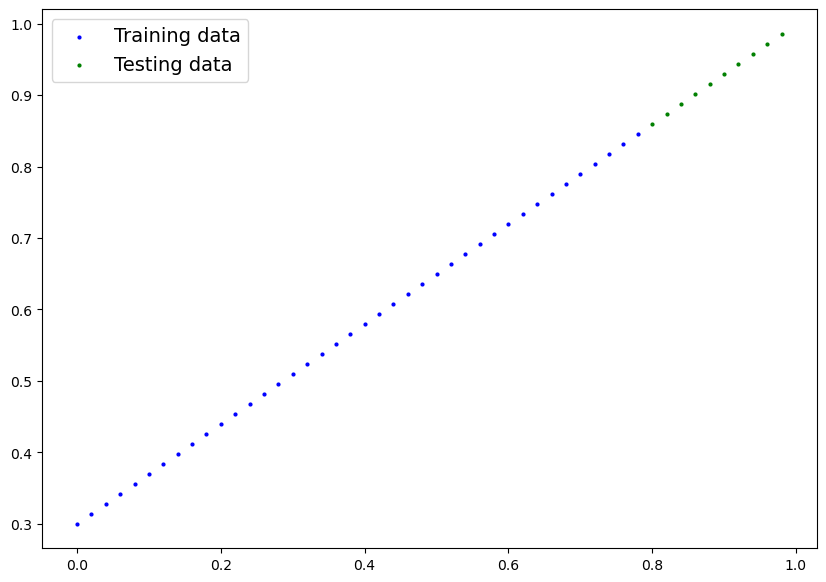

In [54]:
plot_predictions()

## Building a model

My first PyTorch model !

OOP : Object-Oriented Programming in Python
following resource from Real Python : https://realpython.com/python3-object-oriented-programming/

What my model does :
- 무작위 값(무게와 편향)으로 시작한다.
- 훈련 데이터를 살펴보고 무작위 값을 조정하여 이상적인 값(데이터를 생성할 때 사용한 가중치 및 편향 값)을 더 잘 표현하거나 더 가깝게 만든다.

How does it do it?
1. Gradient descent 경사하강법
2. Backpropagation 역전파


In [55]:
from torch import nn
# Create linear regression model class

class LinearRegressionModel(nn.Module): # PyTorch의 거의 모든 것은 nn 모듈에서 상속되므로 nn.Module을 상속해야 한다.
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with a random weights and try to adjust it to the ideal weights
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        self.bias = nn.Parameter(torch.randn(1, # start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True,
                                             dtype=torch.float))
    # Forward method to define the computation in the model : 모델에서 메소드를 정의하는 방법
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x"는 입력 데이터를 나타내는 텐서
        return self.weights * x + self.bias # 선형회귀 공식 적용



### PyTorch model building essentials

![](https://velog.velcdn.com/images/looa0807/post/c1309eac-9dab-4e05-97d3-94a9af307448/image.png)

- **torch.nn** :  그래프 계산을 위한 모든 것을 포함한다.(뉴럴 네트워크)
- **torch.nn.Parameter** : 모델이 학습하려고 시도해야 할 매개변수는 무엇이며, 종종 `torch.nn`의 PyTorch 레이어가 이를 설정한다.
- **torch.nn.Module** : 모든 신경망 모듈의 기본 클래스를 하위 클래스로 분류할 경우`forward()`을 써야한다.
- **torch.optim** : PyTorch의 옵티마이저들이 있는 곳, 경사 하강에 도움이 된다.
- **def forward()** : 모든 `nn.Module` 하위 클래스는 `forward()`를 덮어쓰도록 요구. 이 메서드는 forward 계산에서 발생하는 일을 정의합니다

See more of these essential modules via the PyTorch cheatsheet : https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of the PyTorch model

Now we've created a model, let's check out its contents

So we can check our model parameters or what's inside our model using `model.parameters()`


In [56]:
# Create a random seed
torch.manual_seed(42) # 랜덤 시드 고정

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# 모델의 내부 매개변수를 확인
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [57]:
# 매개변수 이름과 값을 딕셔너리 형태로 확인
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
X_test,y_test

In [ ]:
y_preds = model_0(X_test)
y_preds


In [58]:
# Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

# torch.no _grad(),으로 비슷한 작업을 수행할 수도 있지만, inference_mode()을 선호한다.
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode : https://pytorch.org/docs/stable/generated/torch.inference_mode.html

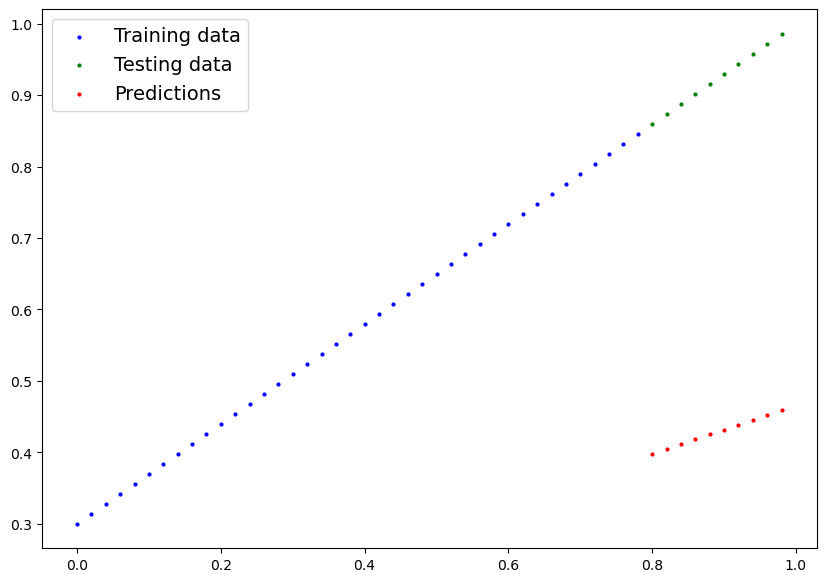

In [59]:
plot_predictions(predictions=y_preds)

### 3. Train model

훈련의 전체 개념은 모델이 어떤 알 수 없는 매개변수(이들은 무작위일 수 있음)에서 어떤 알 수 있는 매개변수로 이동하는 것이다. 데이터의 잘못된 표현에서 좋은 표현으로 이어지는 다른 최악의 상황에서도 마찬가지이다.

모델 예측이 얼마나 부실하거나 얼마나 잘못된지 측정하는 한 가지 방법은 **loss function(손실 함수)**를 사용하는 것이다.

* Note : 손실 함수는 다양한 영역에서 비용 함수 또는 기준이라고도 할 수 있다. 우리의 경우 손실 함수라고 부른다.

Thins we need to train:

* **Loss function** : 모델의 예측이 이상적인 출력에 얼마나 잘못된지를 측정하는 함수로, 낮을수록 좋다.
* **Optimizer** : 모델의 손실을 고려하고, 모델의 매개변수(우리 경우에는 가중치와 편향)를 조정하여 손실 함수를 개선한다.

PyTorch에 특정하게, 우리는 다음을 필요로 한다:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

In [ ]:
# Check out our model's parameters(a parameter is a value that the model learns during training)
model_0.state_dict()

In [60]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = learning rate = 설정할 수 있는 가장 중요한 하이퍼파라미터

Q. 어떤 손실 함수와 최적화 함수를 사용해야 할까요?

A. 이는 문제에 따라 다를 것입니다. 그러나 경험을 쌓으면, 특정 문제 집합에서 무엇이 효과적이고 무엇이 아닌지 알게 됩니다.

예를 들어, 회귀 문제의 경우, `nn.L1Loss()`의 손실 함수와 `torch.optim.SGD()`와 같은 최적화 함수가 충분하다.

그러나 개와 고양이의 사진을 분류하는 것과 같은 분류 문제에서는 `nn.BCELoss()`(binary cross entropy loss)를 사용할 것이다.


### PyTorch에서 훈련 루프 구축
 
 훈련 루프에 필요한 몇 가지 사항:
 0. training loop : 데이터를 반복문으로 처리
 1. forward pass : 데이터를 모델의 `forward()` 함수를 통해 전달하여 예측을 수행하는 전방 전달 과정 - 전방 전파라고도 함
 2. calculate loss(손실함수 계산) : 전방 전달 예측과 실제 라벨을 비교
 3. optimizer zero grad(최적화 함수 초기화) : 매 에포마다 누적되므로, 각 전방 전달마다 새로 시작하도록 0으로 설정합니다.
 4. loss backward(손실 역전파) : 손실에 대한 모델의 각 매개변수에 대한 기울기를 계산하기 위해 네트워크를 역방향으로 이동(**역전파(backpropagation)**)
 5. optimizer step(최적화 함수 단계) : 최적화 함수를 사용하여 손실을 개선하려고 모델의 매개변수를 조정(**경사 하강(gradient descent)**)


In [61]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
X_test, y_test

In [66]:
torch.manual_seed(42) # 랜덤시드 설정(재현성을 위해)

# epochs : 데이터를 반복하는 것 (이것은 우리가 직접 설정했기 때문에 하이퍼파라미터라고 한다.)
epochs = 200

# Track different values
# 모델 진행 상황을 추적하는 데 도움이 되는 유용한 값을 저장하는 빈 리스트를 생성
epoch_count = []
loss_values = []
test_loss_values = []

# 0. 데이터를 반복문으로 처리
# 데이터를 모델을 통해 일정 횟수(예: 100회의 데이터 통과)의 에포크를 수행
for epoch in range(epochs):
    # 모델을 훈련 모드로 설정
    model_0.train()# PyTorch의 훈련 모드는 모든 기울기를 필요로 하는 매개변수를 훈련으로 설정.

    # 1. forward pass
    # 모델의 `forward()` 메서드를 수행하여 데이터를 모델을 통해 전달.
    y_preds = model_0(X_test)

    # 2. Calculate the loss 
    # 모델의 예측이 얼마나 잘못되었는지에 대한 손실 값을 계산.
    loss= loss_fn(y_preds, y_test)

    # 3. optimizer zero grad (최적화 함수 초기화) : 매 에포마다 누적되므로, 각 전방 전달마다 새로 시작하도록 0으로 설정.
    optimizer.zero_grad()

    # 4. loss backward 
    #  손실 함수에 대한 역전파를 수행합니다( `requires_grad=True`인 모든 매개변수의 기울기를 계산합니다)
    loss.backward()
 
    # 5. optimizer step 
    # `loss.backward()`로 계산된 기울기에 따라 모델의 매개변수를 업데이트하는 최적화 함수를 단계를 진행
    optimizer.step() # 루프를 통해 최적화가 누적되므로 다음 루프 반복을 위해 3단계에서 이를 초기화.

    # 모델을 평가 모드로 설정
    # 훈련이 아닌 평가를 원한다고 모델에게 알려준다. (훈련에 사용되지만 평가에는 사용되지 않는 기능을 비활성화)
    model_0.eval() 

    # 더 빠른 성능을 위한 추론 : `torch.inference_mode()` 컨텍스트 관리자를 활성화하여 경사 추적과 같은 기능을 비활성화(추론에는 경사 추적이 필요하지 않다.)
    with torch.inference_mode():

        # 1. forward 전달
        # 모델을 통해 테스트 데이터를 전달합니다(이는 모델의 구현된 `forward()` 메서드를 호출합니다)
        test_pred = model_0(X_test) 

        # 2. 손실 계산
        # 테스트 손실 값 계산(모델의 예측이 테스트 데이터셋에서 얼마나 잘못되었는지, 낮을수록 더 좋음)
        test_loss = loss_fn(test_pred, y_test)

    # 3. 10번째 epoch마다 상태 출력
    # 훈련/테스트 중 모델의 진행 상황을 ~10 에포크마다 출력 (참고: 여기에 출력되는 것은 특정 문제에 맞게 조정할 수 있다.)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")

        # 모델의 매개변수 출력
        print(model_0.state_dict())


Epoch : 0 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor([0.6206])), ('bias', tensor([0.3788]))])
Epoch : 10 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor([0.6206])), ('bias', tensor([0.3788]))])
Epoch : 20 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor([0.6206])), ('bias', tensor([0.3788]))])
Epoch : 30 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor([0.6206])), ('bias', tensor([0.3788]))])
Epoch : 40 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor([0.6206])), ('bias', tensor([0.3788]))])
Epoch : 50 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor([0.6206])), ('bias', tensor([0.3788]))])
Epoch : 60 | Loss : 0.009748500771820545 | Test loss : 0.008172458037734032
OrderedDict([('weights', tensor

In [ ]:
epoch_count, loss_values, test_loss_values

In [64]:
import numpy as np

np.array(torch.tensor(loss_values).numpy()), np.array(torch.tensor(test_loss_values).cpu().numpy())

(array([0.49453616, 0.31532624, 0.13611642, 0.00582951, 0.00588003,
        0.00560547, 0.00544746, 0.00529145, 0.00520974, 0.00521536,
        0.0052327 , 0.00477541, 0.00524264, 0.00451027, 0.00446389,
        0.00438086, 0.0097485 , 0.0097485 , 0.0097485 , 0.0097485 ],
       dtype=float32),
 array([0.4766152 , 0.29740524, 0.11819541, 0.00587019, 0.00587581,
        0.00558046, 0.00542247, 0.0052691 , 0.0053441 , 0.00504441,
        0.00572032, 0.00475039, 0.00553565, 0.00478779, 0.00457301,
        0.00455898, 0.00817246, 0.00817246, 0.00817246, 0.00817246],
       dtype=float32))

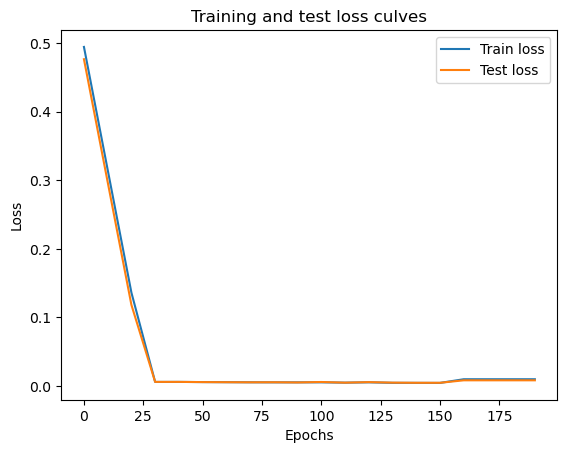

In [65]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss culves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [ ]:
# 새로운 예측 시각화
plot_predictions(predictions=test_pred)


In [ ]:
model_0.state_dict()

In [ ]:
weight, bias

## PyTorch에서 모델 저장하기

PyTorch에서 모델을 저장하고 로드하는 데 사용하는 세 가지 주요 메서드가 있다.

1. `torch.save()` - Python의 **pickle** 형식으로 PyTorch 객체를 저장
2. `torch.load()` - 저장된 PyTorch 객체를 로드
3. `torch.nn.Module.load_state_dict()` - 이 메서드를 사용하여 모델의 저장된 상태 사전을 로드.

PyTorch save & load code tutorial + extra-curriculum: https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference


In [68]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f" Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

# 3. Saving the model state dict
print((model_0.state_dict)) 

 Saving model to : models/01_pytorch_workflow_model_0.pth
<bound method Module.state_dict of LinearRegressionModel()>


In [69]:
!ls -l models/

total 8
-rw-r--r--@ 1 ruahkim  staff  1680 Jan 18 16:54 01_pytorch_workflow_model_0.pth


In [73]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6117])), ('bias', tensor([0.3688]))])

## PyTorch 모델 로드하기
 
모델의 `state_dict()`를 저장했기 때문에, 모델 클래스의 새로운 인스턴스를 생성하고 저장된 `state_dict()` 정보를 로드한다.

In [72]:
# 저장된 state_dict()를 로드하려면 모델 클래스의 새 인스턴스를 생성해야 합니다.
loaded_model_0 = LinearRegressionModel()

# 저장된 model_0의 state_dict를 로드합니다 (이렇게 하면 새로운 인스턴스가 업데이트된 매개변수로 업데이트됩니다)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


/var/folders/dt/dsq7jdxd2kb07j1llwz_5dmr0000gn/T/ipykernel_82277/861577324.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MO

<All keys matched successfully>

In [74]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6117])), ('bias', tensor([0.3688]))])

In [75]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8582],
        [0.8704],
        [0.8827],
        [0.8949],
        [0.9071],
        [0.9194],
        [0.9316],
        [0.9438],
        [0.9561],
        [0.9683]])

In [81]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8582],
        [0.8704],
        [0.8827],
        [0.8949],
        [0.9071],
        [0.9194],
        [0.9316],
        [0.9438],
        [0.9561],
        [0.9683]])

In [80]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])